In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Data preprocessing
train_dir = 'F:/X-Ray_Report/dataset/train'
val_dir = 'F:/X-Ray_Report/dataset/validation'

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation data
val_datagen = ImageDataGenerator(rescale=1./255)


In [15]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Change to 'categorical' if there are more than 2 classes
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 88 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [24]:

# Build the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Change to softmax for multi-class classification
])


f:\P\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

In [26]:
# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3929 - loss: 0.9340 - val_accuracy: 0.7000 - val_loss: 0.7441
Epoch 2/100
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.6875 - loss: 0.8439

f:\P\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - accuracy: 0.6875 - loss: 0.8439 - val_accuracy: 0.7000 - val_loss: 0.6217
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6488 - loss: 0.6651 - val_accuracy: 0.7000 - val_loss: 0.6407
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - accuracy: 0.6562 - loss: 0.6644 - val_accuracy: 0.7000 - val_loss: 0.6221
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7262 - loss: 0.6271 - val_accuracy: 0.7000 - val_loss: 0.5589
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - accuracy: 0.7188 - loss: 0.5959 - val_accuracy: 0.7000 - val_loss: 0.5403
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7103 - loss: 0.5471 - val_accuracy: 0.7000 - val_loss: 0.5227
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 914ms/step - accuracy: 0.6875 - loss: 0.6087 - val_accuracy: 0.7000 - val_loss: 0.4824
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5893 - loss: 0.6439 - val_accuracy: 0.9000 - val_loss: 0.6090
Epoch 10

In [29]:
# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9742 - loss: 0.1342 - val_accuracy: 1.0000 - val_loss: 0.0233
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.9375 - loss: 0.1169 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9062 - loss: 0.1279 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - accuracy: 1.0000 - loss: 0.1336 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8958 - loss: 0.2053 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 0.8750 - loss: 0.2483 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9365 - loss: 0.2068 - val_accuracy: 1.0000 - val_loss: 0.0304
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 870ms/step - accuracy: 1.0000 - loss: 0.0706 - val_accuracy: 1.0000 - val_loss: 0.0

In [31]:
# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9777 - loss: 0.0552 - val_accuracy: 1.0000 - val_loss: 0.0383
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step - accuracy: 0.9688 - loss: 0.0530 - val_accuracy: 1.0000 - val_loss: 0.0562
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - accuracy: 1.0000 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9688 - loss: 0.0976 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - accuracy: 0.9583 - loss: 0.0837 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9881 - loss: 0.0311 - val_accuracy: 0.9000 - val_loss: 0.1141
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 1.0000 - val_loss: 0.0

In [33]:
# Save the model
model.save('xray_cnn_model_t300.h5')

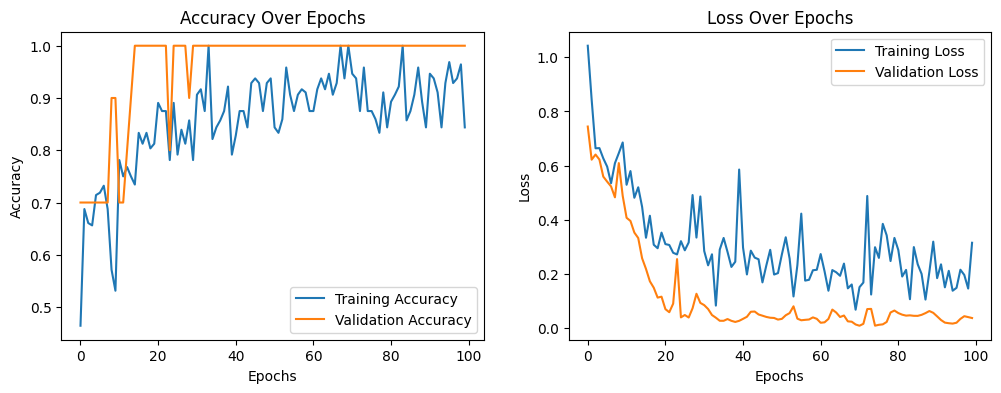

In [28]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.show()

#1st 100 epoch
plot_history(history)

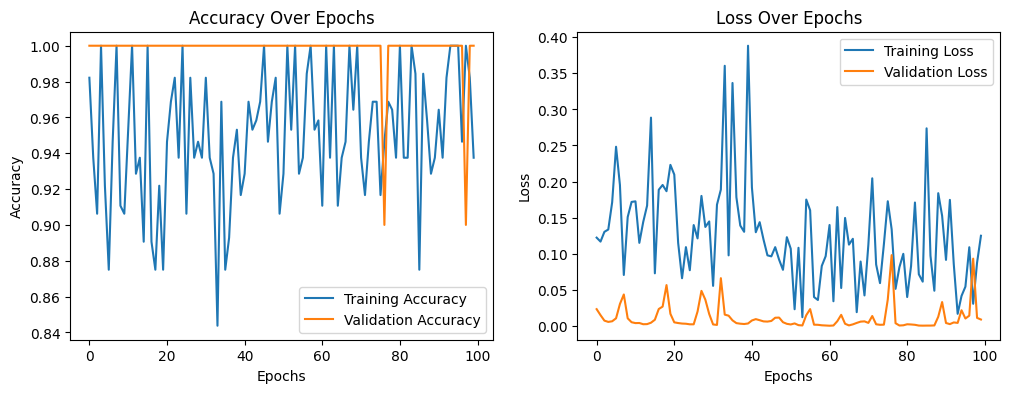

In [30]:
#2nd 100 epoch
plot_history(history)

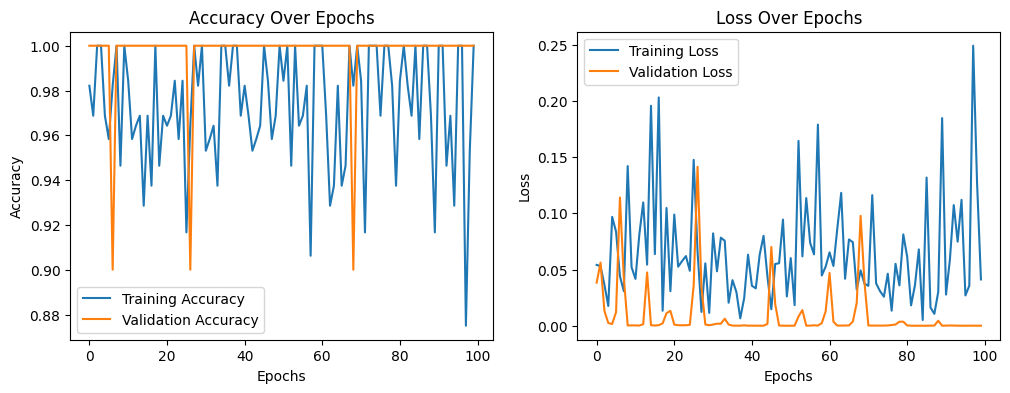

In [32]:
#3rd 100 epoch
plot_history(history)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model('xray_cnn_model_t300.h5')

# Define the test data generator
test_dir = 'F:/X-Ray_Report/dataset/test'  # Replace with the actual path to the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Same size as used in training
    batch_size=32,
    class_mode='binary',  # Use 'categorical' for multi-class classification
    shuffle=False  # Do not shuffle to keep predictions in order
)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 2.2651e-05
Test Loss: 0.0000
Test Accuracy: 1.0000


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model

# Define class labels (adjust these based on your dataset)
class_labels = ['covid', 'normal']  # Modify for multi-class if needed

# Function to predict uploaded image
def predict_xray(image_path):
    # Load the image
    img = load_img(image_path, target_size=(150, 150))  # Resize to match model input size
    img_array = img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    if len(class_labels) == 2:  # Binary classification
        predicted_class = class_labels[0] if prediction[0] < 0.5 else class_labels[1]
        confidence = 1 - prediction[0] if prediction[0] < 0.5 else prediction[0]
    else:  # Multi-class classification
        predicted_class = class_labels[np.argmax(prediction)]
        confidence = np.max(prediction)

    return predicted_class, confidence

# Test the function with an uploaded file
if __name__ == "__main__":
    # Specify the file path (replace with your uploaded file path)
    file_path = input("Enter the file path of the X-ray image: ")
    predicted_class, confidence = predict_xray(file_path)
    print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: normal
